# Baseball Monte Carlo - Data Exploration

This notebook explores the 2025 Blue Jays data and validates data quality.

## Setup

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.scraper import (
    get_team_batting_stats,
    get_league_batting_stats,
    calculate_league_averages,
    prepare_player_stats
)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load 2025 Blue Jays Data

In [2]:
# Try 2025 first, fallback to 2024 if unavailable
try:
    season = 2025
    tor_stats = get_team_batting_stats('TOR', season)
    print(f"Successfully loaded {season} data")
except:
    season = 2024
    tor_stats = get_team_batting_stats('TOR', season)
    print(f"Using {season} data as fallback")

print(f"\nDataset shape: {tor_stats.shape}")
print(f"Number of players: {len(tor_stats)}")

Fetching 2025 batting stats for TOR...
Found 17 players for TOR
Successfully loaded 2025 data

Dataset shape: (17, 320)
Number of players: 17


In [3]:
# Examine available columns
print("Available columns:")
print(tor_stats.columns.tolist())

Available columns:
['IDfg', 'Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG', 'GB', 'FB', 'LD', 'IFFB', 'Pitches', 'Balls', 'Strikes', 'IFH', 'BU', 'BUH', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'wOBA', 'wRAA', 'wRC', 'Bat', 'Fld', 'Rep', 'Pos', 'RAR', 'WAR', 'Dol', 'Spd', 'wRC+', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'phLI', 'PH', 'WPA/LI', 'Clutch', 'FB% (Pitch)', 'FBv', 'SL%', 'SLv', 'CT%', 'CTv', 'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'PO%', 'wFB', 'wSL', 'wCT', 'wCB', 'wCH', 'wSF', 'wKN', 'wFB/C', 'wSL/C', 'wCT/C', 'wCB/C', 'wCH/C', 'wSF/C', 'wKN/C', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'BsR', 'FA% (sc)', 'FT% (sc)', 'FC% (sc)', 'FS% (sc)', 'FO% (sc)', 'SI% (sc)', 'SL% (sc)', 'CU% (sc)', 'KC% (sc)',

## Data Quality Check

In [4]:
# Check for key statistics
key_stats = ['Name', 'PA', 'AVG', 'OBP', 'SLG', 'H', '2B', '3B', 'HR']
missing_cols = [col for col in key_stats if col not in tor_stats.columns]

if missing_cols:
    print(f"WARNING: Missing columns: {missing_cols}")
else:
    print("✓ All key statistics available")

✓ All key statistics available


In [5]:
# Check for missing values in key columns
print("\nMissing values in key columns:")
print(tor_stats[key_stats].isnull().sum())


Missing values in key columns:
Name    0
PA      0
AVG     0
OBP     0
SLG     0
H       0
2B      0
3B      0
HR      0
dtype: int64



Plate Appearances Distribution:
count     17.000000
mean     338.941176
std      216.143318
min       25.000000
25%      174.000000
50%      299.000000
75%      506.000000
max      680.000000
Name: PA, dtype: float64


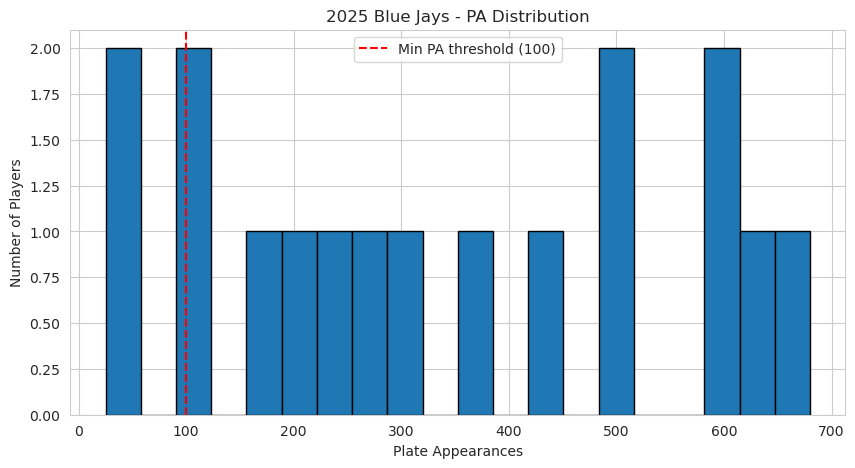

In [6]:
# Distribution of plate appearances
print("\nPlate Appearances Distribution:")
print(tor_stats['PA'].describe())

plt.figure(figsize=(10, 5))
plt.hist(tor_stats['PA'], bins=20, edgecolor='black')
plt.xlabel('Plate Appearances')
plt.ylabel('Number of Players')
plt.title(f'{season} Blue Jays - PA Distribution')
plt.axvline(100, color='red', linestyle='--', label='Min PA threshold (100)')
plt.legend()
plt.show()

## Prepared Dataset

In [7]:
# Prepare stats with minimum PA threshold
prepared = prepare_player_stats(tor_stats, min_pa=100)

print(f"\nQualified players (PA >= 100): {len(prepared)}")
print("\nSample data:")
print(prepared[['name', 'pa', 'ba', 'obp', 'slg', 'iso']].head(10))

Prepared stats for 15 players (min PA: 100)

Qualified players (PA >= 100): 15

Sample data:
                      name   pa     ba    obp    slg    iso
7          George Springer  586  0.309  0.399  0.560  0.251
126         Alejandro Kirk  506  0.282  0.348  0.421  0.139
34   Vladimir Guerrero Jr.  680  0.292  0.381  0.467  0.175
51             Bo Bichette  628  0.311  0.357  0.483  0.172
242          Ernie Clement  588  0.277  0.313  0.398  0.121
97          Daulton Varsho  271  0.238  0.284  0.548  0.310
183         Addison Barger  502  0.243  0.301  0.454  0.211
106         Tyler Heineman  174  0.289  0.361  0.416  0.127
204           Nathan Lukes  438  0.255  0.323  0.407  0.152
291            Myles Straw  299  0.262  0.313  0.367  0.105


In [8]:
# Check for calculated fields
if 'singles' in prepared.columns:
    print("\n✓ Singles calculated successfully")
    print(f"Total singles: {prepared['singles'].sum()}")

if 'iso' in prepared.columns:
    print("✓ ISO calculated successfully")
    print(f"Average ISO: {prepared['iso'].mean():.3f}")


✓ Singles calculated successfully
Total singles: 897
✓ ISO calculated successfully
Average ISO: 0.163


## Statistical Overview

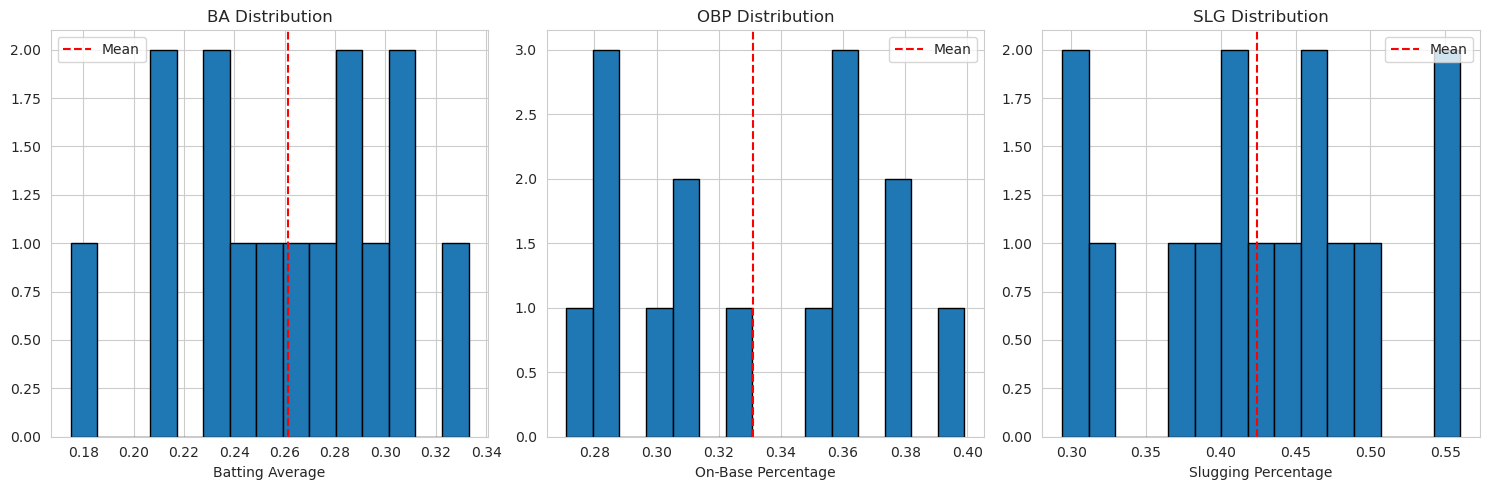

In [9]:
# Slash line distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(prepared['ba'], bins=15, edgecolor='black')
axes[0].set_xlabel('Batting Average')
axes[0].set_title('BA Distribution')
axes[0].axvline(prepared['ba'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

axes[1].hist(prepared['obp'], bins=15, edgecolor='black')
axes[1].set_xlabel('On-Base Percentage')
axes[1].set_title('OBP Distribution')
axes[1].axvline(prepared['obp'].mean(), color='red', linestyle='--', label='Mean')
axes[1].legend()

axes[2].hist(prepared['slg'], bins=15, edgecolor='black')
axes[2].set_xlabel('Slugging Percentage')
axes[2].set_title('SLG Distribution')
axes[2].axvline(prepared['slg'].mean(), color='red', linestyle='--', label='Mean')
axes[2].legend()

plt.tight_layout()
plt.show()

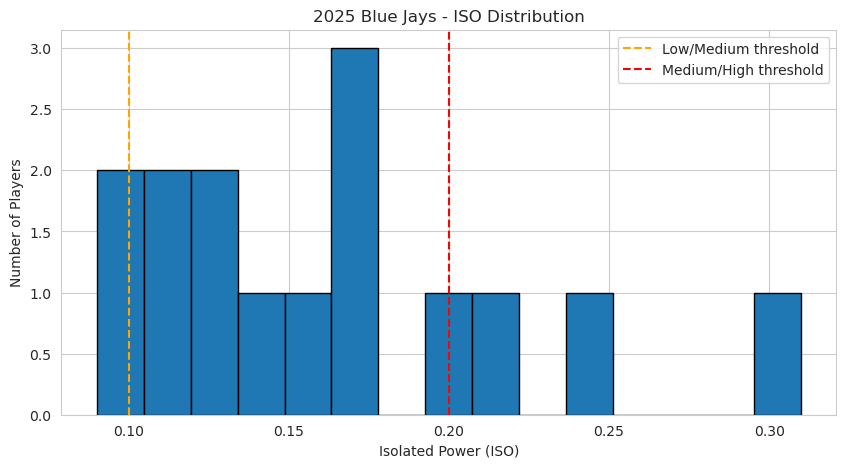


ISO Categories:
Singles hitters (ISO < 0.100): 1
Balanced hitters (0.100 <= ISO < 0.200): 10
Power hitters (ISO >= 0.200): 4


In [10]:
# ISO distribution (power indicator)
plt.figure(figsize=(10, 5))
plt.hist(prepared['iso'], bins=15, edgecolor='black')
plt.xlabel('Isolated Power (ISO)')
plt.ylabel('Number of Players')
plt.title(f'{season} Blue Jays - ISO Distribution')
plt.axvline(0.100, color='orange', linestyle='--', label='Low/Medium threshold')
plt.axvline(0.200, color='red', linestyle='--', label='Medium/High threshold')
plt.legend()
plt.show()

print("\nISO Categories:")
print(f"Singles hitters (ISO < 0.100): {(prepared['iso'] < 0.100).sum()}")
print(f"Balanced hitters (0.100 <= ISO < 0.200): {((prepared['iso'] >= 0.100) & (prepared['iso'] < 0.200)).sum()}")
print(f"Power hitters (ISO >= 0.200): {(prepared['iso'] >= 0.200).sum()}")

## Hit Type Distribution

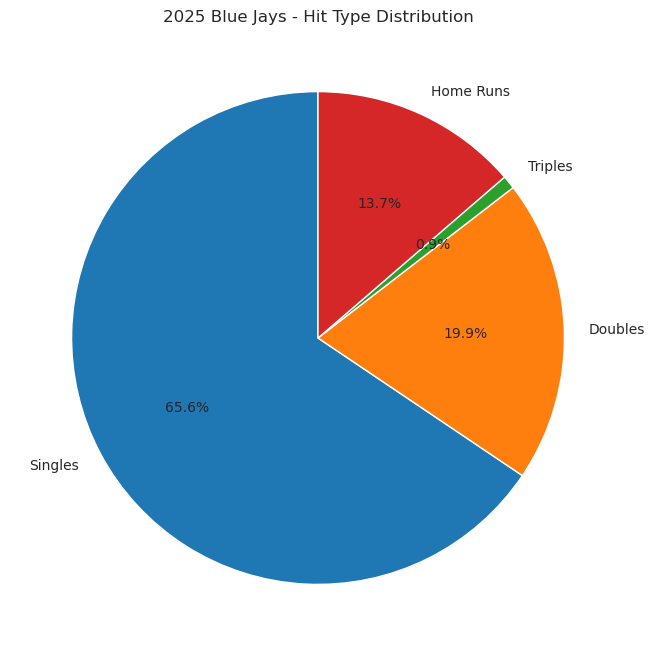


Team hit type distribution:
Singles: 65.6%
Doubles: 19.9%
Triples: 0.9%
Home Runs: 13.7%


In [11]:
if all(col in prepared.columns for col in ['singles', 'doubles', 'triples', 'hr', 'hits']):
    # Calculate hit type percentages
    total_hits = prepared['hits'].sum()
    hit_types = {
        'Singles': prepared['singles'].sum() / total_hits * 100,
        'Doubles': prepared['doubles'].sum() / total_hits * 100,
        'Triples': prepared['triples'].sum() / total_hits * 100,
        'Home Runs': prepared['hr'].sum() / total_hits * 100
    }
    
    plt.figure(figsize=(8, 8))
    plt.pie(hit_types.values(), labels=hit_types.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(f'{season} Blue Jays - Hit Type Distribution')
    plt.show()
    
    print("\nTeam hit type distribution:")
    for hit_type, pct in hit_types.items():
        print(f"{hit_type}: {pct:.1f}%")

## League Averages

In [12]:
# Calculate league averages for fallback
league_avg = calculate_league_averages(season, min_pa=300)

print("\n=== League Averages ===")
print("\nHit Distribution (given a hit occurred):")
for hit_type, prob in league_avg['hit_distribution'].items():
    print(f"{hit_type}: {prob:.3f} ({prob*100:.1f}%)")

print("\nSlash Line:")
for stat, value in league_avg['slash_line'].items():
    print(f"{stat}: {value:.3f}")

print(f"\nBased on {league_avg['n_players']} qualified players")

Fetching 2025 league-wide batting stats...
Found 277 qualified players

=== League Averages ===

Hit Distribution (given a hit occurred):
1B: 0.644 (64.4%)
2B: 0.193 (19.3%)
3B: 0.016 (1.6%)
HR: 0.147 (14.7%)

Slash Line:
BA: 0.252
OBP: 0.322
SLG: 0.417
ISO: 0.165

Based on 277 qualified players


## Top Performers

In [13]:
# Show top 10 by different metrics
print("\n=== Top 10 by OPS (OBP + SLG) ===")
prepared['ops'] = prepared['obp'] + prepared['slg']
top_ops = prepared.nlargest(10, 'ops')[['name', 'pa', 'ba', 'obp', 'slg', 'ops', 'iso']]
print(top_ops.to_string(index=False))


=== Top 10 by OPS (OBP + SLG) ===
                 name  pa    ba   obp   slg   ops   iso
      George Springer 586 0.309 0.399 0.560 0.959 0.251
       Joey Loperfido 104 0.333 0.379 0.500 0.879 0.167
Vladimir Guerrero Jr. 680 0.292 0.381 0.467 0.848 0.175
          Bo Bichette 628 0.311 0.357 0.483 0.840 0.172
       Daulton Varsho 271 0.238 0.284 0.548 0.832 0.310
      Davis Schneider 227 0.234 0.361 0.436 0.797 0.202
       Tyler Heineman 174 0.289 0.361 0.416 0.777 0.127
       Alejandro Kirk 506 0.282 0.348 0.421 0.769 0.139
       Addison Barger 502 0.243 0.301 0.454 0.755 0.211
         Nathan Lukes 438 0.255 0.323 0.407 0.730 0.152


In [14]:
print("\n=== Top 10 by ISO (Power) ===")
top_iso = prepared.nlargest(10, 'iso')[['name', 'pa', 'ba', 'obp', 'slg', 'iso']]
if 'hr' in prepared.columns:
    top_iso = prepared.nlargest(10, 'iso')[['name', 'pa', 'ba', 'obp', 'slg', 'iso', 'hr']]
print(top_iso.to_string(index=False))


=== Top 10 by ISO (Power) ===
                 name  pa    ba   obp   slg   iso  hr
       Daulton Varsho 271 0.238 0.284 0.548 0.310  20
      George Springer 586 0.309 0.399 0.560 0.251  32
       Addison Barger 502 0.243 0.301 0.454 0.211  21
      Davis Schneider 227 0.234 0.361 0.436 0.202  11
Vladimir Guerrero Jr. 680 0.292 0.381 0.467 0.175  23
          Bo Bichette 628 0.311 0.357 0.483 0.172  18
       Joey Loperfido 104 0.333 0.379 0.500 0.167   4
         Nathan Lukes 438 0.255 0.323 0.407 0.152  12
       Alejandro Kirk 506 0.282 0.348 0.421 0.139  15
       Tyler Heineman 174 0.289 0.361 0.416 0.127   3


## Data Quality Summary

In [15]:
print("\n=== DATA QUALITY SUMMARY ===")
print(f"✓ Season: {season}")
print(f"✓ Team: Toronto Blue Jays")
print(f"✓ Total players in dataset: {len(tor_stats)}")
print(f"✓ Qualified players (PA >= 100): {len(prepared)}")
print(f"✓ All required statistics available: {not bool(missing_cols)}")
print(f"✓ Singles calculated: {'singles' in prepared.columns}")
print(f"✓ ISO calculated: {'iso' in prepared.columns}")
print(f"\n✓ Team slash line: {prepared['ba'].mean():.3f}/{prepared['obp'].mean():.3f}/{prepared['slg'].mean():.3f}")
print(f"✓ Ready for simulation: YES")


=== DATA QUALITY SUMMARY ===
✓ Season: 2025
✓ Team: Toronto Blue Jays
✓ Total players in dataset: 17
✓ Qualified players (PA >= 100): 15
✓ All required statistics available: True
✓ Singles calculated: True
✓ ISO calculated: True

✓ Team slash line: 0.261/0.331/0.424
✓ Ready for simulation: YES


## Save Processed Data

In [16]:
from src.data.scraper import save_data

save_data(prepared, f'blue_jays_{season}_prepared.csv', 'processed')
print(f"\n✓ Processed data saved to data/processed/blue_jays_{season}_prepared.csv")

Saved data to data/processed/blue_jays_2025_prepared.csv

✓ Processed data saved to data/processed/blue_jays_2025_prepared.csv


In [17]:
# Save league averages as JSON for later use
import json

# Convert numpy/pandas types to native Python types
def convert_to_native(obj):
    """Convert numpy/pandas types to native Python types for JSON serialization."""
    import numpy as np
    if isinstance(obj, dict):
        return {k: convert_to_native(v) for k, v in obj.items()}
    elif isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    return obj

league_avg_serializable = convert_to_native(league_avg)

league_avg_path = f'data/processed/league_averages_{season}.json'
with open(league_avg_path, 'w') as f:
    json.dump(league_avg_serializable, f, indent=2)
print(f"✓ League averages saved to {league_avg_path}")

✓ League averages saved to data/processed/league_averages_2025.json
